In [29]:
# Import the required libraries and dependencies
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from fastquant import get_crypto_data
from fastquant import get_stock_data
%matplotlib inline

In [30]:
closing_prices_df = pd.read_csv(
    Path("./Resources/asset_data.csv"))
closing_prices_df

,Date,AAPL,SPY,MSFT,ETH,BTC
0,1/4/2016,26.337500,201.020004,54.799999,NaN,NaN
1,1/5/2016,25.677500,201.360001,55.049999,NaN,NaN
2,1/6/2016,25.174999,198.820007,54.049999,NaN,NaN
3,1/7/2016,24.112499,194.050003,52.169998,NaN,NaN
4,1/8/2016,24.240000,191.919998,52.330002,NaN,NaN
...,...,...,...,...,...,...
1506,12/27/2021,180.330002,477.260010,342.450012,4037.547607,50640.41797
1507,12/28/2021,179.289993,476.869995,341.250000,3800.893066,47588.85547
1508,12/29/2021,179.380005,477.480011,341.950012,3628.531738,46444.71094
1509,12/30/2021,178.199997,476.160000,339.320007,3713.852051,47178.12500


In [31]:
closing_prices_df.head()

,Date,AAPL,SPY,MSFT,ETH,BTC
0,1/4/2016,26.337500,201.020004,54.799999,NaN,NaN
1,1/5/2016,25.677500,201.360001,55.049999,NaN,NaN
2,1/6/2016,25.174999,198.820007,54.049999,NaN,NaN
3,1/7/2016,24.112499,194.050003,52.169998,NaN,NaN
4,1/8/2016,24.240000,191.919998,52.330002,NaN,NaN


In [32]:
closing_prices_df["Daily Returns AAPL"] = closing_prices_df["AAPL"].pct_change()
closing_prices_df = closing_prices_df.dropna()

In [33]:
closing_prices_df["Daily Return SPY"] = closing_prices_df["SPY"].pct_change()
closing_prices_df = closing_prices_df.dropna()

In [34]:
closing_prices_df["Daily Return MSFT"] = closing_prices_df["MSFT"].pct_change()
closing_prices_df = closing_prices_df.dropna()

In [43]:
closing_prices_df["Daily Return ETH/USDT"] = closing_prices_df["ETH"].pct_change()
closing_prices_df = closing_prices_df.dropna()

KeyError: 'ETH'

In [36]:
closing_prices_df["Daily Return BTC"] = closing_prices_df["BTC"].pct_change()
closing_prices_df = closing_prices_df.dropna()

In [37]:
closing_prices_df.head()

,Date,AAPL,SPY,MSFT,ETH,BTC,Daily Returns AAPL,Daily Return SPY,Daily Return MSFT,Daily Return BTC
471,11/14/2017,42.834999,257.730011,84.050003,337.631012,6635.750000,-0.015118,-0.002323,0.001430,0.011626
472,11/15/2017,42.270000,256.440002,82.980003,333.356995,7315.540039,-0.013190,-0.005005,-0.012731,0.102444
473,11/16/2017,42.775002,258.619995,83.199997,330.924011,7871.689941,0.011947,0.008501,0.002651,0.076023
474,11/17/2017,42.537498,257.859985,82.400002,332.394012,7708.990234,-0.005552,-0.002939,-0.009615,-0.020669
475,11/20/2017,42.494999,258.299988,82.529999,366.730011,8200.639648,-0.000999,0.001706,0.001578,0.063776


In [41]:
from fastquant import get_stock_data
df = get_stock_data("AAPL", "2018-01-01", "2020-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume
dt,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200


In [42]:
from fastquant import get_crypto_data
df_ETH = get_crypto_data("ETH/USDT", "2018-01-01", "2020-12-31")
df.head()

,open,high,low,close,volume
dt,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200


Starting Portfolio Value: 100000.00
2020-12-30T00:00:00, ===Global level arguments===
2020-12-30T00:00:00, init_cash : 100000
2020-12-30T00:00:00, buy_prop : 1
2020-12-30T00:00:00, sell_prop : 1
2020-12-30T00:00:00, commission : 0
2020-12-30T00:00:00, stop_loss : 0
2020-12-30T00:00:00, stop_trail : 0
2020-12-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 15
slow_period : 40
2020-12-30T00:00:00, Final Portfolio Value: 301497.60788345337
2020-12-30T00:00:00, Final PnL: 201497.61
Time used (seconds): 0.5178556442260742
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest

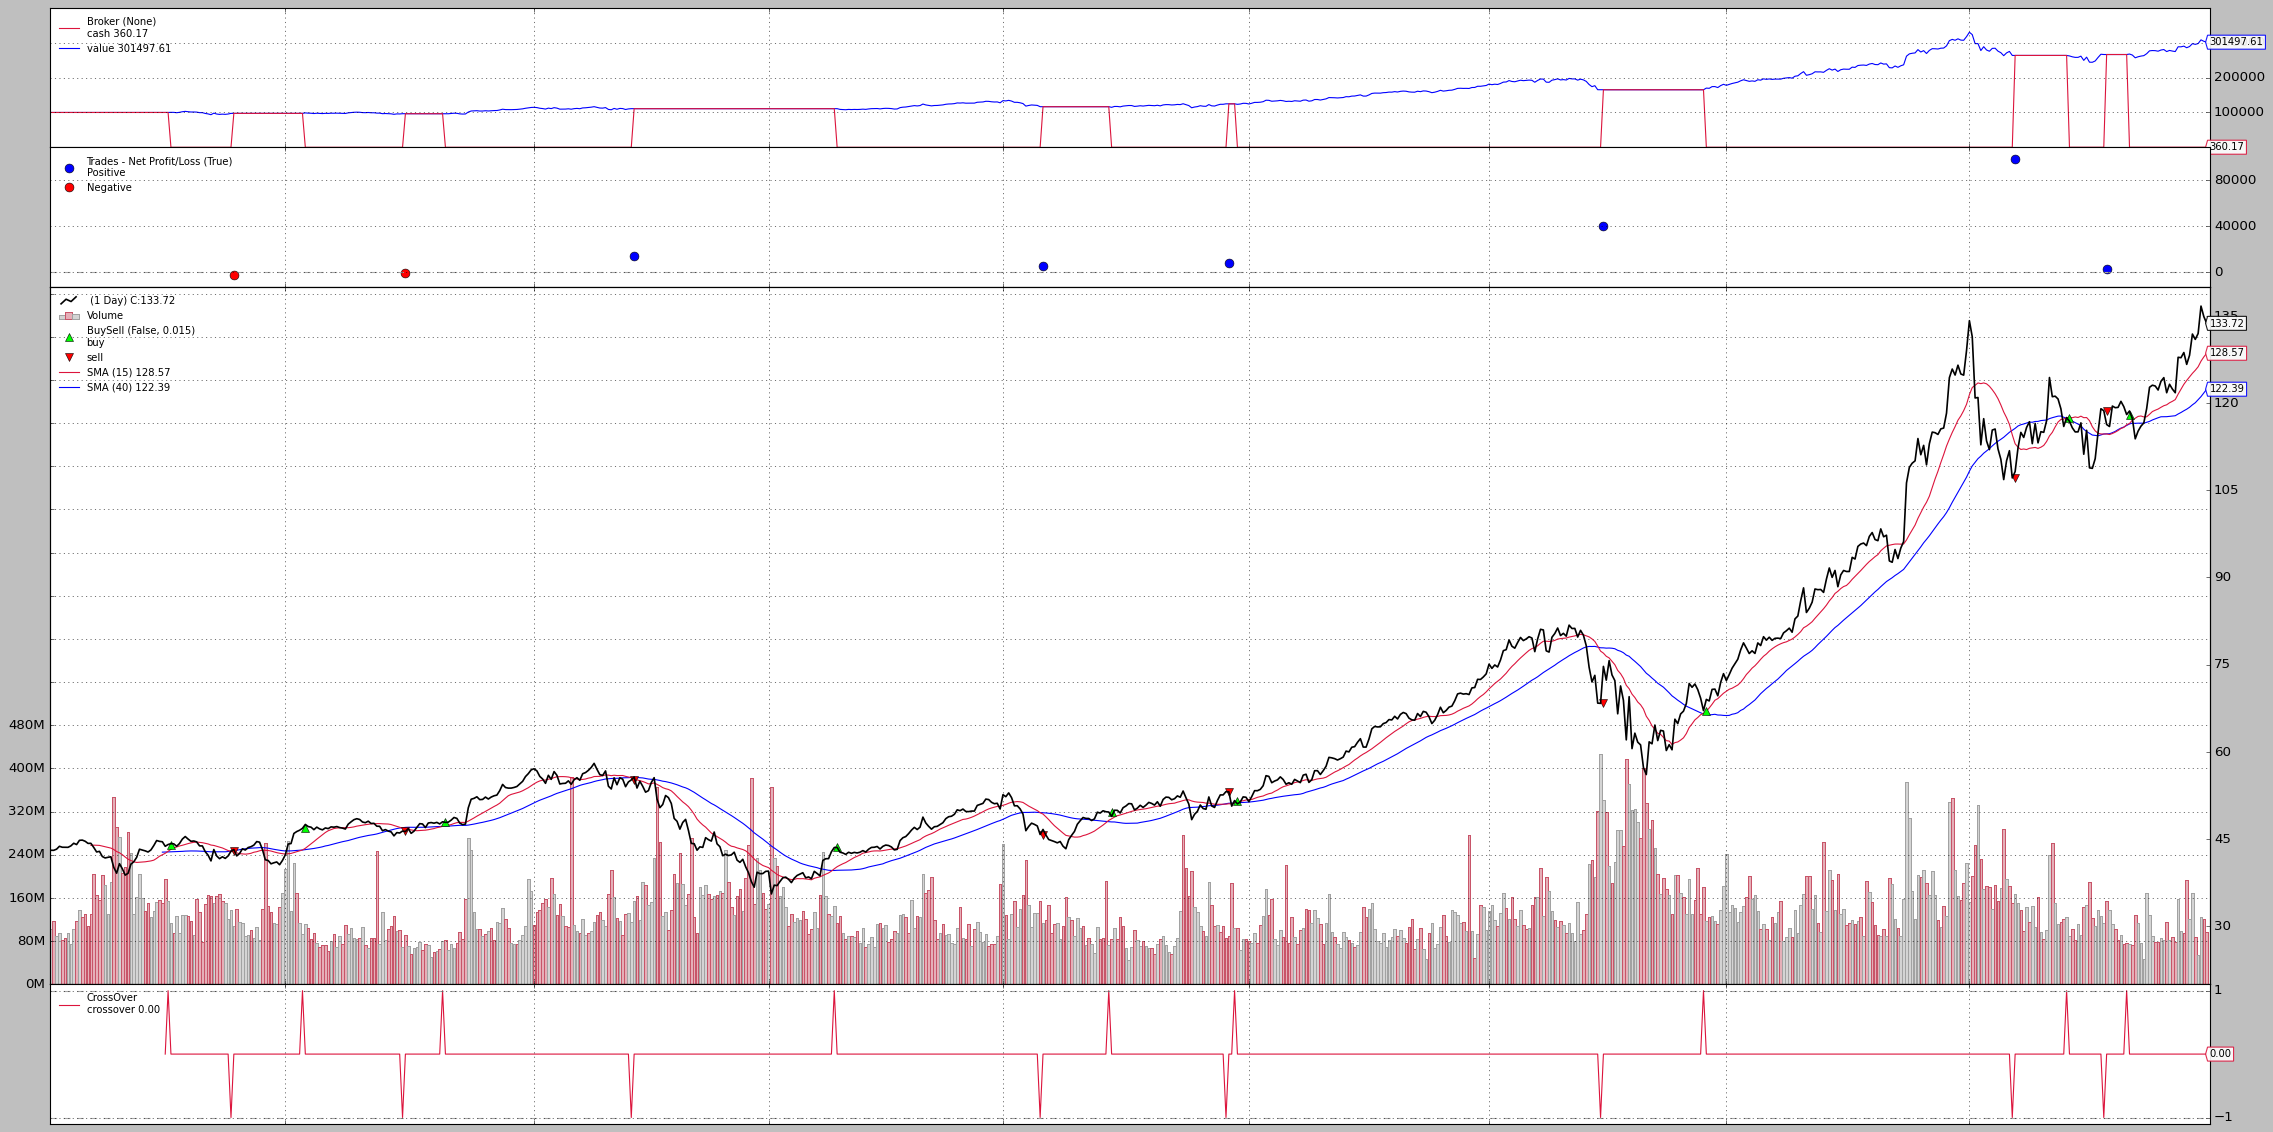

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,15,40,1.103592,0.001462,0.44535,44.534956,83,8.646494,28536.369064,"{'len': 109, 'drawdown': 26.085516511616586, '...",26.085517,109,1.778556,201497.61,301497.607883,9,0.666667,6,2,28289.430194,28.28943,-1786.429388,-1.786429,98387.604752,98.387605,-2607.053459,-2.607053


In [14]:
from fastquant import backtest
backtest("smac", df, fast_period=15, slow_period=40)


In [15]:
results = backtest("smac", df, fast_period=range(1, 21), slow_period=range(20, 241, 5))
results[["fast_period", "slow_period", "final_value"]].head()


Streaming output truncated to the last 5000 lines.
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:5	slow_period:50
Returns	rtot:1.1493668123452394	ravg:0.0015223401488016416	rnorm:0.467601913750215	rnorm100:46.7601913750215
Sharpe	sharperatio:2.015378592660139
Drawdown	len:83	drawdown:11.155916281502074	moneydown:39631.48977661133	max:AutoOrderedDict([('len', 106), ('drawdown', 24.34475557206548), ('moneydown', 86484.95625305176)])
Timedraw	maxdrawdown:24.34475557206548	maxdrawdownperiod:106
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	

ValueError: ignored

In [21]:
Initial Capital = 100000

SyntaxError: invalid syntax (Temp/ipykernel_15292/828090402.py, line 1)

In [23]:
from fastquant import backtest
res = backtest("smac", closing_prices_df, fast_period=range(9, 13, 50), slow_period=range(13, 100, 200), verbose=False)

# Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'execution_type': 'close', 'fast_period': 15, 'slow_period': 40}
# Optimal metrics: {'rtot': 0.022, 'ravg': 9.25e-05, 'rnorm': 0.024, 'rnorm100': 2.36, 'sharperatio': None, 'pnl': 2272.9, 'final_value': 102272.90}

print(res[['fast_period', 'slow_period', 'final_value']].head())

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [18]:
from fastquant import backtest

fast_periods = np.arange(1,20,1, dtype=int)
slow_periods = np.arange(20,241,5, dtype=int)

results = backtest("smac", 
                   closing_prices_df, 
                   fast_period=fast_periods, 
                   slow_period=slow_periods, 
                   verbose=False, 
                   plot=False
                  )


AttributeError: ignored

NameError: ignored

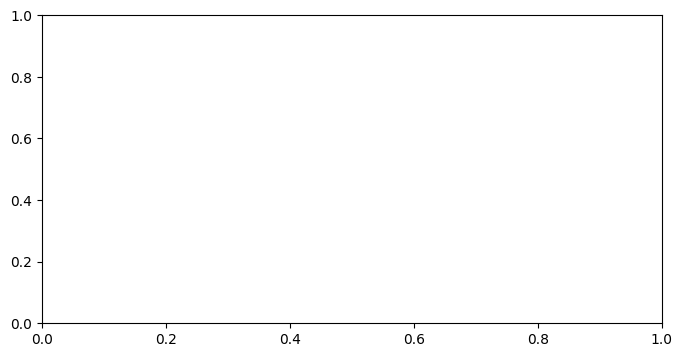

In [19]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as pl
pl.style.use("default")

fig, ax = pl.subplots(1,1, figsize=(8,4))
xmin, xmax = slow_periods[0],slow_periods[-1]
ymin, ymax = fast_periods[0],fast_periods[-1]

#make a diverging color map such that profit<0 is red and blue otherwise
cmap = pl.get_cmap('RdBu')
norm = mcolors.DivergingNorm(vmin=period_grid.min(), 
                             vmax = period_grid.max(), 
                             vcenter=0
                            )
#plot matrix
cbar = ax.imshow(period_grid, 
                 origin='lower', 
                 interpolation='none', 
                 extent=[xmin, xmax, ymin, ymax], 
                 cmap=cmap,
                 norm=norm
                )
pl.colorbar(cbar, ax=ax, shrink=0.9,
            label='net profit', orientation="horizontal")

# search position with highest net profit
y, x = np.unravel_index(np.argmax(period_grid), period_grid.shape)
best_slow_period = slow_periods[x]
best_fast_period = fast_periods[y]
# mark position
# ax.annotate(f"max profit={period_grid[y, x]:.0f}@({best_slow_period}, {best_fast_period}) days", 
#             (best_slow_period+5,best_fast_period+1)
#            )
ax.axvline(best_slow_period, 0, 1, c='k', ls='--')
ax.axhline(best_fast_period+0.5, 0, 1, c='k', ls='--')

# add labels
ax.set_aspect(5)
pl.setp(ax,
        xlim=(xmin,xmax),
        ylim=(ymin,ymax),
        xlabel='slow period (days)',
        ylabel='fast period (days)',
        title='SPY w/ SMAC',
       );
